# Data Visualization

## Create combined DataFrame

In [1]:
import pandas as pd

from src.process_data import process_all_data_files

In [2]:
process_all_data_files()

Data directory already exists. Removing.
Data directory has been deleted and reconstructed.


Processing data files:   0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
data = pd.read_csv('./data/combined.data')
data = data.astype(str)

In [4]:
data.head(5)

,en,es
0,Lauri Watts,Lauri Watts
1,& Lauri. Watts. mail;,& Lauri. Watts. mail;
2,ROLES_OF_TRANSLATORS,Rafael Osuna rosuna@wol. es Traductor Miguel R...
3,2006-02-26 3.5.1,2006-02-26 3.5.1
4,The Babel & konqueror; plugin gives you quick ...,La extensión Babel de & konqueror; le permite ...


## Let's look at some statistics about our dataset

In [5]:
len(data)

397383

In [6]:
data.columns

Index(['en', 'es'], dtype='object')

In [7]:
all_eng_words = ' '.join(data['en']).lower().split()
all_span_words = ' '.join(data['es']).lower().split()

print(f"Total number of English words: {len(all_eng_words)}")
print(f"Total number of Spanish words: {len(all_span_words)}")

Total number of English words: 4581136
Total number of Spanish words: 4703772


In [8]:
uniq_eng_words = set(all_eng_words)
uniq_span_words = set(all_span_words)

print(f"Total number of unique English words: {len(uniq_eng_words)}")
print(f"Total number of unique Spanish words: {len(uniq_span_words)}")

Total number of unique English words: 191405
Total number of unique Spanish words: 249779


In [9]:
from collections import Counter

eng_ctr = Counter(all_eng_words)
span_ctr = Counter(all_span_words)

print(f"Most common English word: {eng_ctr.most_common(1)[0]}")
print(f"Most common Spanish word: {span_ctr.most_common(1)[0]}")

Most common English word: ('the', 252244)
Most common Spanish word: ('de', 256606)


In [10]:
data['en_wc'] = data['en'].apply(lambda x: len(x.lower().split()))
data['es_wc'] = data['es'].apply(lambda x: len(x.lower().split()))

avg_lengths = {
    'en': data['en_wc'].mean(),
    'es': data['es_wc'].mean()
}

print(f"Average length of English phrases/sentences: {avg_lengths['en']}")
print(f"Average length of Spanish phrases/sentences: {avg_lengths['es']}")

Average length of English phrases/sentences: 11.52826366502845
Average length of Spanish phrases/sentences: 11.836872739900802


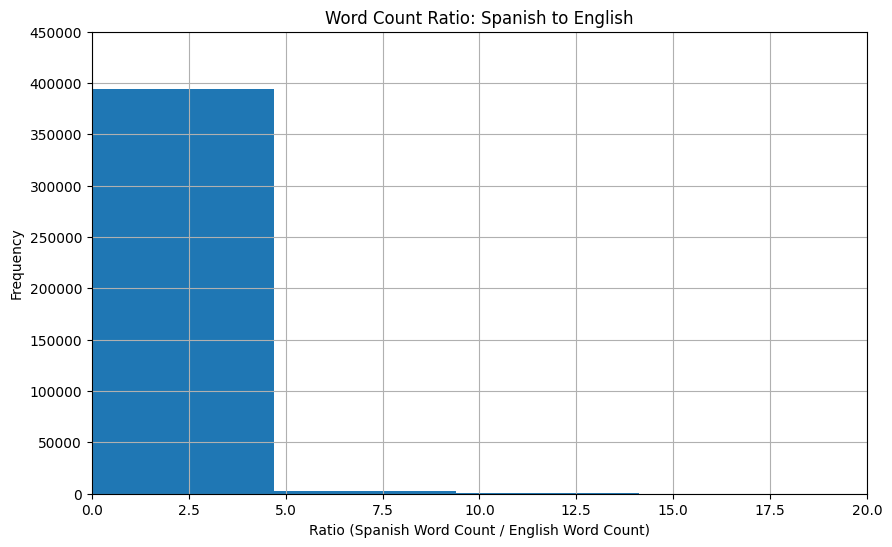

In [11]:
import matplotlib.pyplot as plt

data['length_ratio'] = data['es_wc'] / data['en_wc']
data['length_ratio'].hist(bins=20, figsize=(10, 6))
plt.title('Word Count Ratio: Spanish to English')
plt.xlabel('Ratio (Spanish Word Count / English Word Count)')
plt.ylabel('Frequency')
plt.xlim(0, 20)
plt.ylim(0, 450_000)
plt.savefig('./figures/wc_ratio.png')
plt.show()

## Let's take at look at some Word Clouds

In [12]:
import re
from wordcloud import STOPWORDS

en_text = ' '.join(data['en'].astype(str).tolist())

en_text = re.sub(r'[^A-Za-z\s]', '', en_text)

en_text = en_text.lower()

stopwords = set(STOPWORDS)
en_text = ' '.join(word for word in en_text.split() if word not in stopwords)

In [13]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/midge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
es_text = ' '.join(data['es'].astype(str).tolist())

es_text = re.sub(r'[^A-Za-z\s]', '', es_text)

es_text = es_text.lower()

stopwords = set(nltk.corpus.stopwords.words("spanish"))
es_text = ' '.join(word for word in es_text.split() if word not in stopwords)

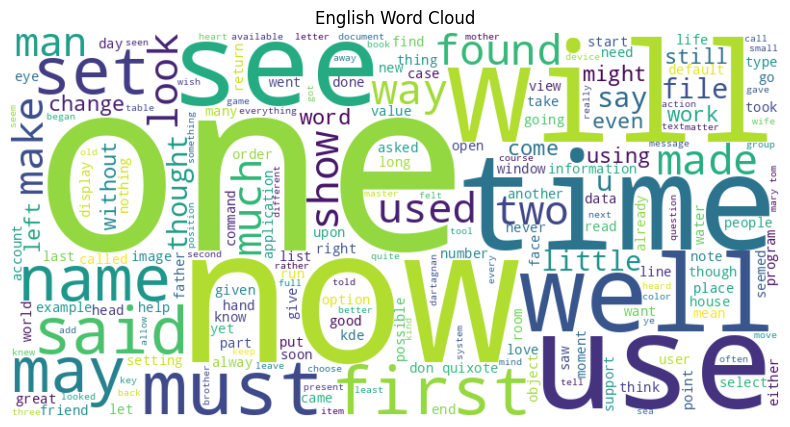

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(en_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("English Word Cloud")
plt.savefig('./figures/eng_wordcloud.png')
plt.show()

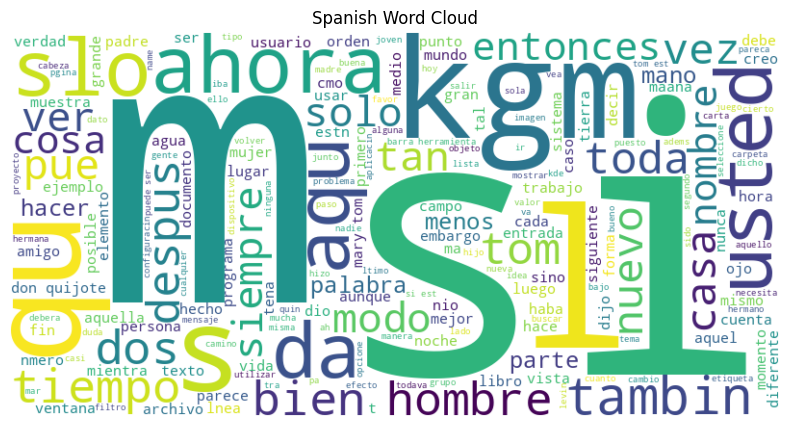

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(es_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Spanish Word Cloud")
plt.savefig('./figures/span_wordcloud.png')
plt.show()

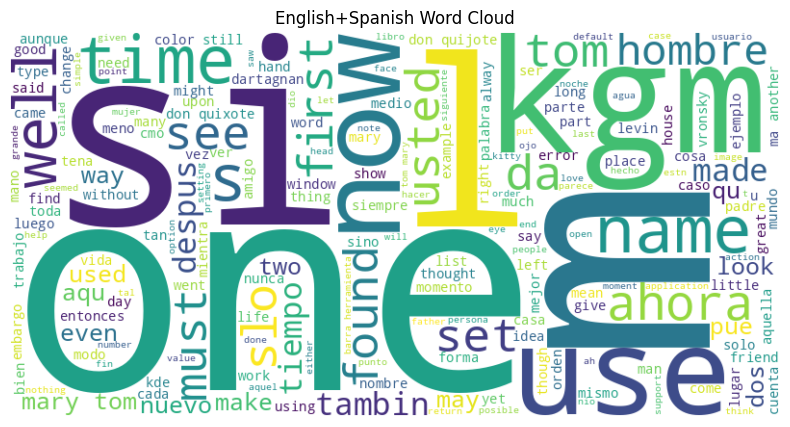

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = en_text + es_text

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("English+Spanish Word Cloud")
plt.savefig('./figures/eng-span_wordcloud.png')
plt.show()